In [1]:
from data import create_train_val_loader
from options import utils
import yaml
import collections
import argparse
from matplotlib import pyplot as plt
import torch

/home/jfaath/anaconda3/envs/dlp/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
from options.opts import get_training_arguments

sys.argv = ['cvnets', '--common.config-file', 'config/classification/data_test.yaml']
opts = get_training_arguments()

In [4]:
train_loader, val_loader, train_sampler = create_train_val_loader(opts)

2022-04-09 14:00:12 - LOGS    - Training and validation dataset details: 
TinyImagenetDataset(
	root=/home/jfaath/projects/image_data/tiny-imagenet-200/train
	 is_training=True
	samples=100000
	transforms=Compose(
			RandomResizedCrop(scale=[0.08, 1.0], ratio=(0.9, 1.1), interpolation=bilinear), 
			RandomHorizontalFlip(p=0.5), 
			NumpyToTensor())
)
TinyImagenetDataset(
	root=/home/jfaath/projects/image_data/tiny-imagenet-200/val/images
	 is_training=False
	samples=10000
	transforms=Compose(
			Resize(size=96, interpolation=bilinear), 
			CenterCrop(size=(h=64, w=64)), 
			NumpyToTensor())
)
2022-04-09 14:00:12 - LOGS    - Training sampler details: 
BatchSampler(
 	 base_im_size=(h=64, w=64)
 	 base_batch_size=128
	
)
2022-04-09 14:00:12 - LOGS    - Validation sampler details: 
BatchSampler(
 	 base_im_size=(h=64, w=64)
 	 base_batch_size=100
	
)
2022-04-09 14:00:12 - LOGS    - Number of data workers: 4


In [5]:
x = []
for batch_id, batch in enumerate(train_loader):
#     img = batch['image'][0]
#     img = torch.moveaxis(img, 0, 2).cpu().numpy()
#     plt.imshow(img)
#     print(batch['label'])
    x.append(batch_id)
    
#     break
print(len(x))

782


In [ ]:
import pickle
def open_test_data():
    return open('labels.pickle', 'rb')

with open_test_data() as f:
    dict1 = pickle.load(f)
    
len(dict1)

[0.08, 1.0]
(0.9, 1.1)


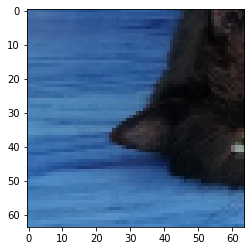

In [25]:
from data.transforms.image import RandomResizedCrop
import cv2

img = cv2.imread("/home/jfaath/Downloads/sarek.jpeg")
data = {'image': img}

rrs = RandomResizedCrop(opts, (64, 64))
print(rrs.scale)
print(rrs.ratio)
new_img = rrs(data)['image']
plt.imshow(new_img)

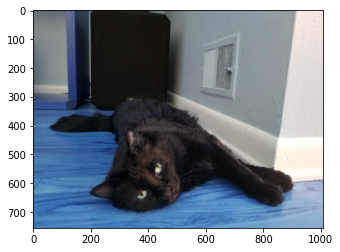

In [33]:

plt.imshow(img)